Воронов Кирилл Михайлович, М8О-407Б-19

# Лабораторная номер 3

## Predicting Pulsar Star
## Предсказание пульсара
https://www.kaggle.com/datasets/colearninglounge/predicting-pulsar-starintermediate

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import collections
import sklearn
import pickle

In [20]:
data1 = pd.read_csv('/content/pulsar_data_train.csv')
data2 = pd.read_csv('/content/pulsar_data_test.csv')
data = pd.concat([data1, data2])

print(data.shape)
data.head()

(17898, 9)


,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0


1. Mean of the integrated profile: среднее значение интегрированного профиля
2. Standard deviation of the integrated profile: стандартное отклонение интегрированного профиля
3. Excess kurtosis of the integrated profile: избыточный эксцесс интегрированного профиля
4. Skewness of the integrated profile: асимметрия интегрированного профиля
5. Mean of the DM-SNR curve: среднее значение кривой DM-SNR
6. Standard deviation of the DM-SNR curve: стандартное отклонение кривой DM-SNR
7. Excess kurtosis of the DM-SNR curve: избыточный эксцесс кривой DM-SNR
8. Skewness of the DM-SNR curve: асимметрия кривой DM-SNR
9. target_class: пульсар или нет

In [21]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17898 entries, 0 to 5369
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                17898 non-null  float64
 1    Standard deviation of the integrated profile  17898 non-null  float64
 2    Excess kurtosis of the integrated profile     15396 non-null  float64
 3    Skewness of the integrated profile            17898 non-null  float64
 4    Mean of the DM-SNR curve                      17898 non-null  float64
 5    Standard deviation of the DM-SNR curve        16196 non-null  float64
 6    Excess kurtosis of the DM-SNR curve           17898 non-null  float64
 7    Skewness of the DM-SNR curve                  17029 non-null  float64
 8   target_class                                   12528 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None


Проверим на наличие пустых данных

In [22]:
data.isna().sum()

 Mean of the integrated profile                     0
 Standard deviation of the integrated profile       0
 Excess kurtosis of the integrated profile       2502
 Skewness of the integrated profile                 0
 Mean of the DM-SNR curve                           0
 Standard deviation of the DM-SNR curve          1702
 Excess kurtosis of the DM-SNR curve                0
 Skewness of the DM-SNR curve                     869
target_class                                     5370
dtype: int64

In [23]:
data.shape

(17898, 9)

Удалим эти данные

In [24]:
data = data.dropna()

In [25]:
data.isna().sum()

 Mean of the integrated profile                  0
 Standard deviation of the integrated profile    0
 Excess kurtosis of the integrated profile       0
 Skewness of the integrated profile              0
 Mean of the DM-SNR curve                        0
 Standard deviation of the DM-SNR curve          0
 Excess kurtosis of the DM-SNR curve             0
 Skewness of the DM-SNR curve                    0
target_class                                     0
dtype: int64

In [26]:
data.shape

(9273, 9)

In [27]:
data.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0
7,109.406250,55.912521,0.565106,0.056247,2.797659,19.496527,9.443282,97.374578,0.0


In [28]:
data.shape

(9273, 9)

Удалим дубликаты, если они есть

In [29]:
data.drop_duplicates(keep='last')

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0
7,109.406250,55.912521,0.565106,0.056247,2.797659,19.496527,9.443282,97.374578,0.0
...,...,...,...,...,...,...,...,...,...
12522,124.828125,50.586731,0.233563,-0.286908,2.342809,13.949966,9.226188,117.308146,0.0
12523,124.312500,53.179053,-0.012418,-0.556021,7.186455,29.308266,4.531382,21.725143,0.0
12525,116.031250,43.213846,0.663456,0.433088,0.785117,11.628149,17.055215,312.204325,0.0
12526,135.664062,49.933749,-0.089940,-0.226726,3.859532,21.501505,7.398395,62.334018,0.0


Посмотрим на распределения признаков

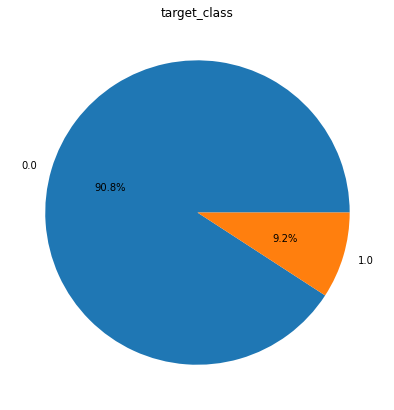

In [30]:
fig = plt.figure(figsize=(7,7))
plt.pie(data["target_class"].value_counts(), labels = data["target_class"].value_counts().index, autopct='%1.1f%%')
plt.title("target_class")
None

Не пульсаров намного больше чем пульсаров, придется делать оверсепмлинг путем копирования данных.

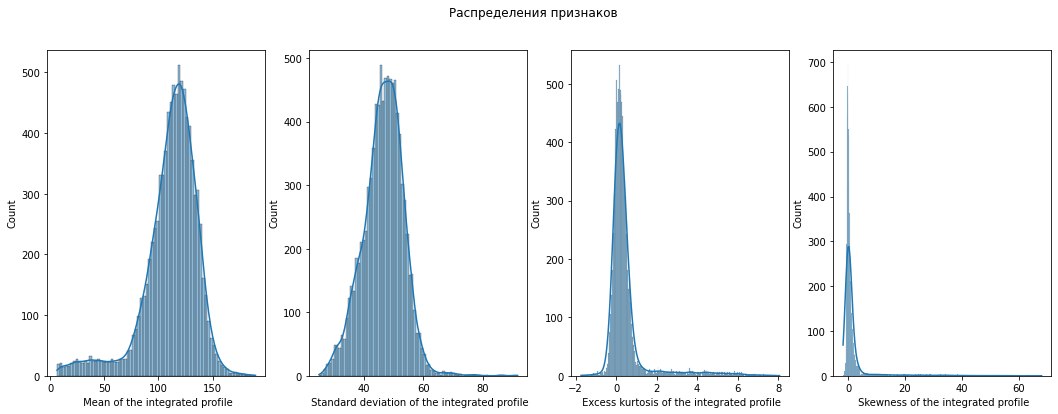

In [31]:
fig, ax = plt.subplots(1,4, figsize=(18,6))
fig.suptitle('Распределения признаков')
sns.histplot(data[' Mean of the integrated profile'], ax = ax[0], kde = True)
sns.histplot(data[' Standard deviation of the integrated profile'], ax = ax[1], kde = True)
sns.histplot(data[' Excess kurtosis of the integrated profile'], ax = ax[2], kde = True)
sns.histplot(data[' Skewness of the integrated profile'], ax = ax[3], kde = True)
None

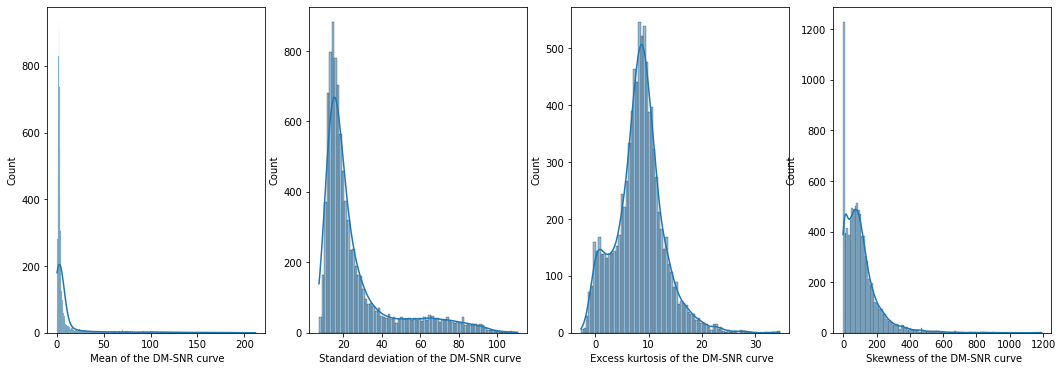

In [32]:
fig, ax = plt.subplots(1,4, figsize=(18,6))
sns.histplot(data[' Mean of the DM-SNR curve'], ax = ax[0], kde = True)
sns.histplot(data[' Standard deviation of the DM-SNR curve'], ax = ax[1], kde = True)
sns.histplot(data[' Excess kurtosis of the DM-SNR curve'], ax = ax[2], kde = True)
sns.histplot(data[' Skewness of the DM-SNR curve'], ax = ax[3], kde = True)
None

Распределения признаков отдалённо похожи на нормальное

In [33]:
data.corr()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
Mean of the integrated profile,1.000000,0.554197,-0.872497,-0.734920,-0.299984,-0.307431,0.236010,0.146103,-0.675819
Standard deviation of the integrated profile,0.554197,1.000000,-0.528370,-0.542560,-0.011061,-0.059486,0.036907,0.030959,-0.368223
Excess kurtosis of the integrated profile,-0.872497,-0.528370,1.000000,0.944715,0.421126,0.436362,-0.344571,-0.216748,0.790866
Skewness of the integrated profile,-0.734920,-0.542560,0.944715,1.000000,0.415570,0.415902,-0.328328,-0.204109,0.704743
Mean of the DM-SNR curve,-0.299984,-0.011061,0.421126,0.415570,1.000000,0.796449,-0.614526,-0.353186,0.407043
Standard deviation of the DM-SNR curve,-0.307431,-0.059486,0.436362,0.415902,0.796449,1.000000,-0.807013,-0.573260,0.493163
Excess kurtosis of the DM-SNR curve,0.236010,0.036907,-0.344571,-0.328328,-0.614526,-0.807013,1.000000,0.924326,-0.390352
Skewness of the DM-SNR curve,0.146103,0.030959,-0.216748,-0.204109,-0.353186,-0.573260,0.924326,1.000000,-0.258428
target_class,-0.675819,-0.368223,0.790866,0.704743,0.407043,0.493163,-0.390352,-0.258428,1.000000


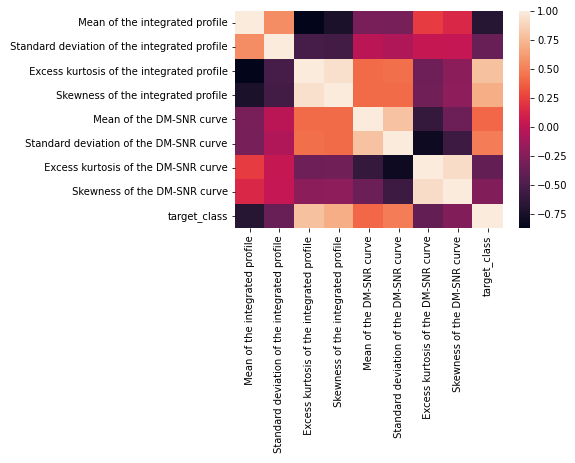

In [34]:
sns.heatmap(data.corr())
None

Больше всего влияет: Mean of the integrated profile

Меньше всего: Excess kurtosis of the integrated profile 	Skewness of the integrated profile

In [35]:
data.describe()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
count,9273.000000,9273.000000,9273.000000,9273.000000,9273.000000,9273.000000,9273.000000,9273.000000,9273.000000
mean,111.133750,46.514053,0.479546,1.790673,12.735359,26.327860,8.327933,105.783345,0.091664
std,25.686405,6.781320,1.071155,6.286567,29.766782,19.542634,4.549914,108.166669,0.288567
min,6.187500,24.772042,-1.738021,-1.791886,0.213211,7.370432,-2.636857,-1.976976,0.000000
25%,100.984375,42.398382,0.024497,-0.188021,1.910535,14.376641,5.788817,34.917943,0.000000
50%,115.234375,46.895026,0.223858,0.202884,2.797659,18.435186,8.427475,83.151969,0.000000
75%,127.328125,51.001785,0.472066,0.930710,5.459866,28.387019,10.721934,139.770330,0.000000
max,189.734375,91.808628,8.069522,68.101622,211.948997,110.642211,34.539844,1191.000837,1.000000


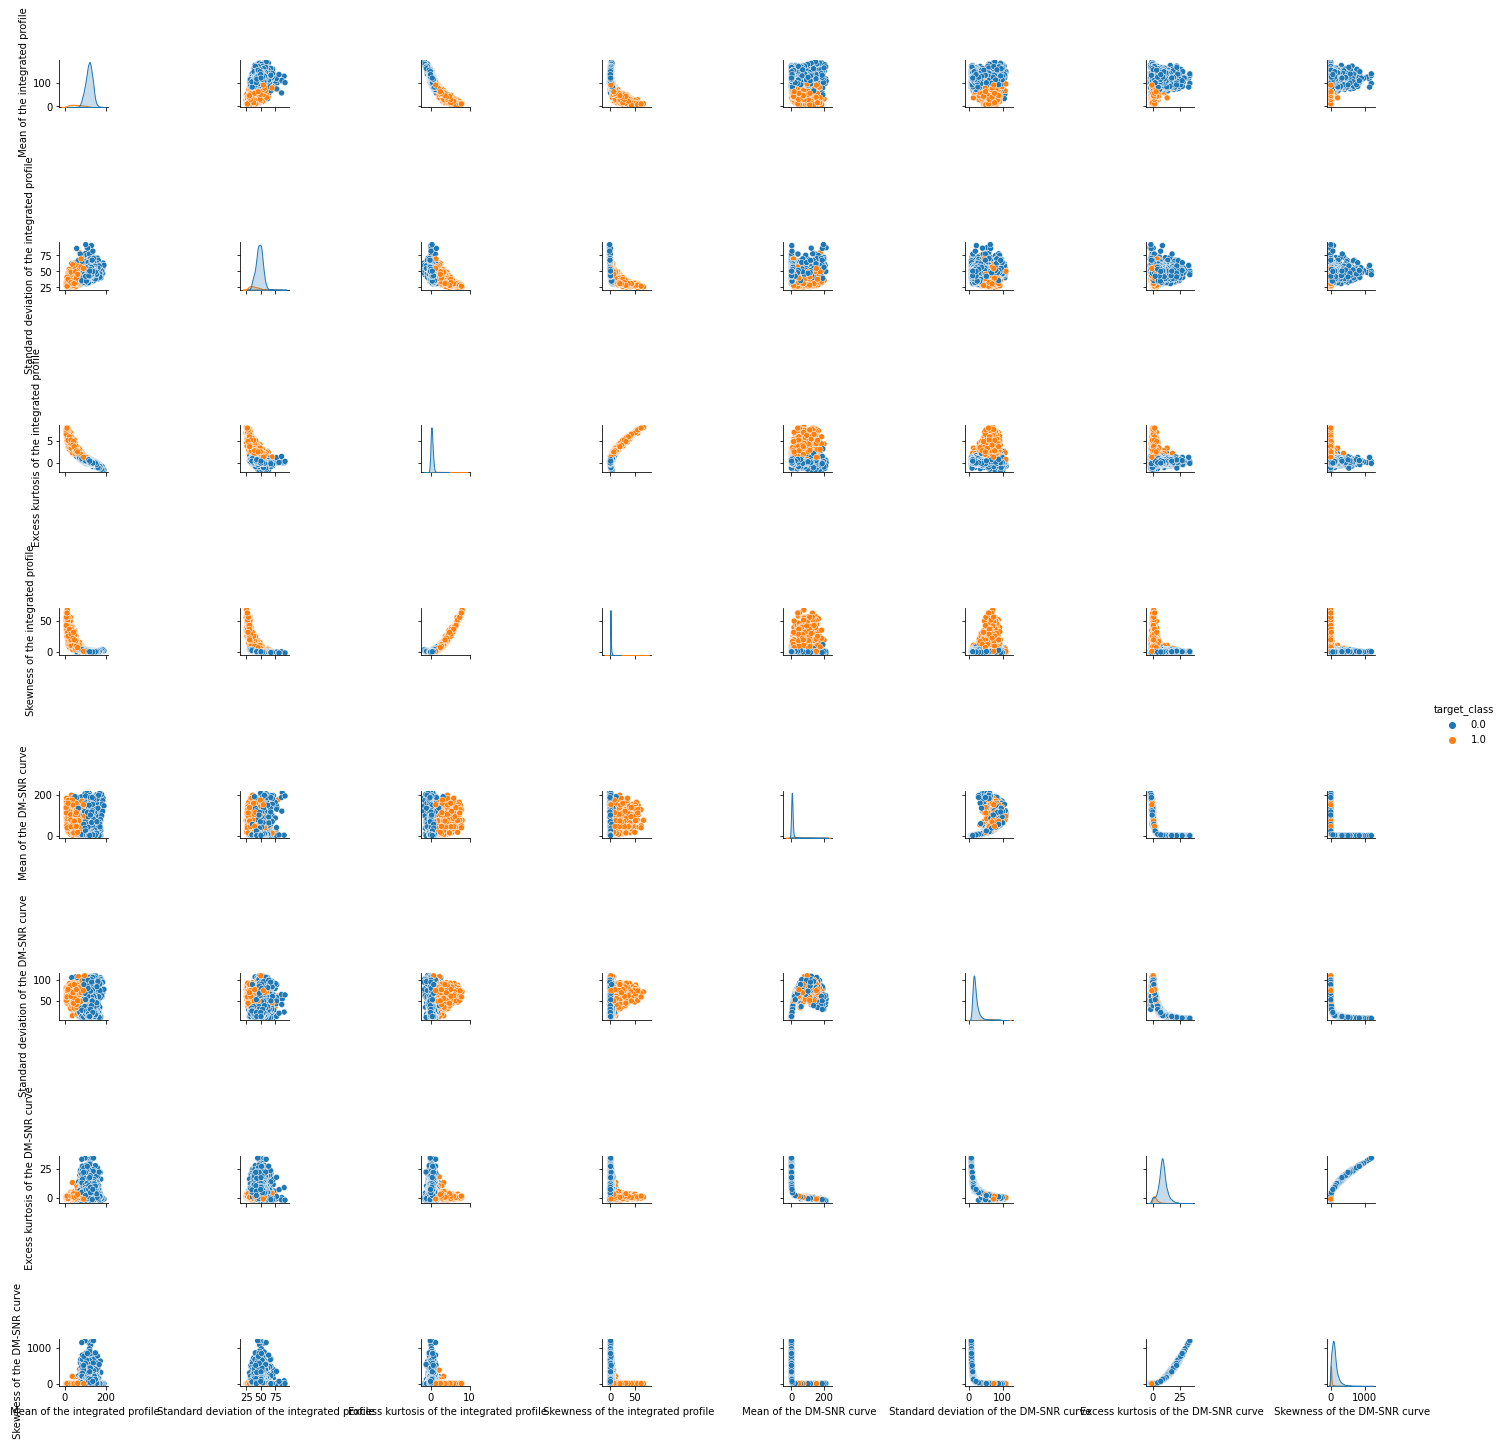

In [36]:
sns.pairplot(data = data, hue = 'target_class')
None

Видно, что во многих местах классы более-менее можно разделить линией

### Оверсемплинг путём копирования данных

In [37]:
sample = data[data['target_class'] == 1]
while data[data['target_class'] == 1].shape[0] + sample.shape[0] < data[data['target_class'] == 0].shape[0]:
    data = pd.concat([data, sample])
data = pd.concat([data, sample.iloc[:data[data['target_class'] == 0].shape[0] - data[data['target_class'] == 1].shape[0]]])

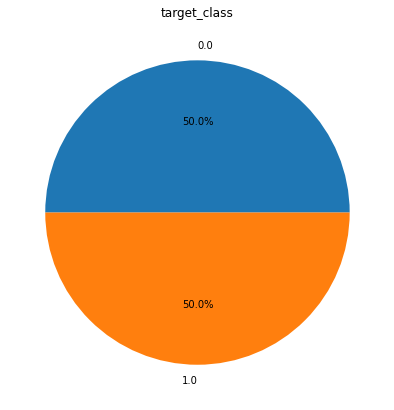

In [38]:
fig = plt.figure(figsize = (7,7))
plt.pie(data["target_class"].value_counts(), labels = data["target_class"].value_counts().index, autopct='%1.1f%%')
plt.title("target_class")
None

### Разделение данных на тестовые и обучающие

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import max_error
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import RocCurveDisplay
from sklearn.linear_model import SGDClassifier

x = data.drop(columns = 'target_class')
y = data['target_class']
x_train, x_test, train_labels, test_labels = train_test_split(x.to_numpy(), y.to_numpy(dtype = np.uint16), test_size = 0.2, random_state = 30)

### Функция отображение результатов

In [40]:
def Print_scores(test_labels, x_test_predict):
    print(f"Accuracy tests: {accuracy_score(test_labels, x_test_predict)}")
    matrix = confusion_matrix(test_labels, x_test_predict)
    disp = ConfusionMatrixDisplay(confusion_matrix = matrix)
    disp.plot()
    plt.show()
    print(f"Precision tests: {precision_score(test_labels, x_test_predict)}")
    print(f"Recall tests: {recall_score(test_labels, x_test_predict)}")
    RocCurveDisplay.from_predictions(test_labels, x_test_predict)
    plt.show()

# Linear/ Logistic Regression

In [41]:
from sklearn.base import BaseEstimator, ClassifierMixin

class Linear(BaseEstimator, ClassifierMixin):
    def __init__(self, lr, nepoch, batch_size):
        self.lr = lr
        self.nepoch = nepoch
        self.batch_size = batch_size
        pass
    
    def sigmoid(self, x):
        self.l = 1 / (1 + np.exp(-x))
        return self.l
        
    def fit(self, data, labels):
        data = np.concatenate((data, np.ones((data.shape[0],1))), axis = 1)
        self.W = np.random.normal(0, 1, (len(data[0]),))
        
        for i in range(self.nepoch):
            for i in range(0, len(data), self.batch_size):
                xb = data[i:i + self.batch_size]
                yb = labels[i:i + self.batch_size]
                p = np.dot(self.W, xb.T)
                s = self.sigmoid(p)
                dp = np.dot(xb.T, (s - yb).T)
                self.W -= self.lr * dp
        
    def predict(self, maindata):
        maindata = np.concatenate((maindata, np.ones((maindata.shape[0],1))), axis = 1)
        p = np.dot(self.W, maindata.T)
        s = self.sigmoid(p)
        return (s > 0.5).astype('int64')


In [42]:
lin = Pipeline(steps = [('normalizer', Normalizer()),('lin', Linear(0.1, 10, 5))])
print(lin.get_params())

{'memory': None, 'steps': [('normalizer', Normalizer()), ('lin', Linear(batch_size=5, lr=0.1, nepoch=10))], 'verbose': False, 'normalizer': Normalizer(), 'lin': Linear(batch_size=5, lr=0.1, nepoch=10), 'normalizer__copy': True, 'normalizer__norm': 'l2', 'lin__batch_size': 5, 'lin__lr': 0.1, 'lin__nepoch': 10}


{'lin__batch_size': 1, 'lin__lr': 0.1, 'lin__nepoch': 20}
Accuracy train: 0.9105077266946703
Accuracy tests: 0.9026706231454006


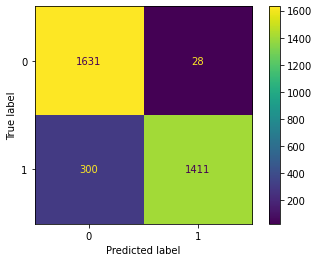

Precision tests: 0.980542043085476
Recall tests: 0.8246639392168322


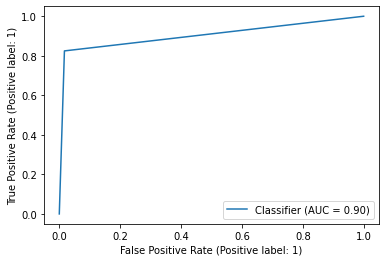

In [43]:
gcv = GridSearchCV(estimator = lin, param_grid={'lin__nepoch': [1, 5, 10, 20], 'lin__batch_size': [1, 5, 10], 'lin__lr': [0.1, 0.01, 0.001]})
gcv.fit(x_train, train_labels)
print(gcv.best_params_)
print(f"Accuracy train: {gcv.best_score_}")
x_test_predict = gcv.best_estimator_.predict(x_test)
Print_scores(test_labels, x_test_predict)

In [44]:
lin = Pipeline(steps = [('normalizer', Normalizer()),('lin', SGDClassifier(loss = 'log'))])
print(lin.get_params())

{'memory': None, 'steps': [('normalizer', Normalizer()), ('lin', SGDClassifier(loss='log'))], 'verbose': False, 'normalizer': Normalizer(), 'lin': SGDClassifier(loss='log'), 'normalizer__copy': True, 'normalizer__norm': 'l2', 'lin__alpha': 0.0001, 'lin__average': False, 'lin__class_weight': None, 'lin__early_stopping': False, 'lin__epsilon': 0.1, 'lin__eta0': 0.0, 'lin__fit_intercept': True, 'lin__l1_ratio': 0.15, 'lin__learning_rate': 'optimal', 'lin__loss': 'log', 'lin__max_iter': 1000, 'lin__n_iter_no_change': 5, 'lin__n_jobs': None, 'lin__penalty': 'l2', 'lin__power_t': 0.5, 'lin__random_state': None, 'lin__shuffle': True, 'lin__tol': 0.001, 'lin__validation_fraction': 0.1, 'lin__verbose': 0, 'lin__warm_start': False}


{'lin__alpha': 0.0001, 'lin__max_iter': 1500}
Accuracy train: 0.9169634392737402
Accuracy tests: 0.914540059347181


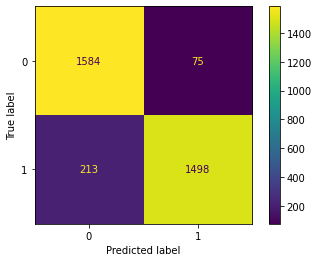

Precision tests: 0.9523204068658614
Recall tests: 0.8755113968439509


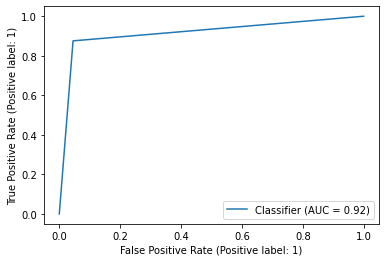

In [45]:
gcv = GridSearchCV(estimator = lin, param_grid = {'lin__max_iter': [100, 1000, 1500], 'lin__alpha': [0.1, 0.001, 0.0001]})
gcv.fit(x_train, train_labels)
print(gcv.best_params_)
print(f"Accuracy train: {gcv.best_score_}")
x_test_predict = gcv.best_estimator_.predict(x_test)
Print_scores(test_labels, x_test_predict)

Как и предполагалось, линейная модель хорошо себя показывает

# Decision Tree

In [59]:
from sklearn.base import BaseEstimator, ClassifierMixin


class DecisionTree(BaseEstimator, ClassifierMixin):
    
    def entropy(self, x):
        return np.sum(-x * np.log2(x + (np.abs(x) < 1e-14)))
        #return np.sum(x * (1 - x))
    
    def __init__(self, leaf_size = 1, depth = 4, features = None):
        self.leaf_size = leaf_size
        self.depth = depth
        self.features = features
    
    class Node:
        def __init__(self):
            self.left = None
            self.right = None
            self.value = None
            self.number = None
        
    def fit(self, data, labels):
        self.root = self.Node()
        self.grow_tree(self.root, data, labels, np.arange(len(labels)), 0)
        return self
    
    #Считаем вероятность единички
    def ans(self, y):
        k = 0
        
        for i in range(len(y)):
            if y[i] == 1:
                k += 1
        return k / len(y)
        
    
    def grow_tree(self, node, data, labels, idx, depth):
        
        x = data[idx]
        y = labels[idx]
        
        if (not self.depth is None) and (self.depth < depth):            
            node.value = self.ans(y)
            return
        
        if self.leaf_size >= len(x):
            node.value = self.ans(y)
            return
        
        if (len(np.unique(y)) == 1):
            node.value = self.ans(y)
            return
        
        maximum = -1
        split_id = 0
        leftidx = np.array([])
        rightidx = np.array([])
        index = 0
        
        for i in (self.features if self.features is not None else range(data.shape[1])):
            left = 1
            sortid = x[:, i].argsort()
            left_classes = np.zeros(2)
            left_classes[y[sortid[0]]] = 1
            
            classes = np.zeros(2)
            for j in range(len(sortid)):
                classes[y[sortid[j]]] += 1
            
            xm = self.entropy(classes / len(x))
            
            lenxm = len(sortid)
            
            right_classes = np.zeros(2)
            
            for j in range(left, len(sortid)):
                right_classes[y[sortid[j]]] += 1
            
            while left < len(x):
                
                while left < len(x) and abs(x[sortid[left-1]][i] - x[sortid[left-2]][i]) < 1e-4:
                    left += 1
                    left_classes[y[sortid[left - 1]]] += 1
                    right_classes[y[sortid[left - 1]]] -= 1
                
                if left == len(x):
                    break
                
                p = left_classes / left
                xl = self.entropy(p)
                p = right_classes / (len(x) - left)
                xr = self.entropy(p)
                
                lenxl = left
                lenxr = len(x) - left
                
                
                if maximum < xm * lenxm - lenxl * xl - lenxr * xr:
                    maximum = xm * lenxm - lenxl * xl - lenxr * xr
                    split_id = left - 1
                    leftidx = sortid[0:left]
                    rightidx = sortid[left:]
                    index = i
                
                left += 1
                
                left_classes[y[sortid[left - 1]]] += 1
                right_classes[y[sortid[left - 1]]] -= 1   
                
                
        if len(leftidx) == 0 or  len(rightidx) == 0:
            node.value = self.ans(y)
            return
        
        node.number = index
        node.value = x[sortid[split_id]][index]
        node.left = self.Node()
        node.right = self.Node()
        
        self.grow_tree(node.left, x, y, leftidx , depth + 1)
        self.grow_tree(node.right, x, y, rightidx , depth + 1)
        

    def print_tree(node, d = 0):
        if node is None:
            return
        print(' '*4*d, node.number, node.value)
        print_tree(node.left, d + 1)
        print_tree(node.right, d + 1)
    
    def predict_proba(self, data):
        res = np.ndarray((data.shape[0], 2))
        for i, st in enumerate(data):
            node = self.root
            while not node.number is None:
                if st[node.number] > node.value:
                    node = node.right
                else:
                    node = node.left
            res[i][1] = node.value
            res[i][0] = 1 - node.value
        return res
    
    def predict(self, data):
        return np.argmax(self.predict_proba(data), axis = 1)

{'depth': 60, 'features': [3], 'leaf_size': 1}
Accuracy train: 0.9784061868610406
Accuracy tests: 0.983679525222552


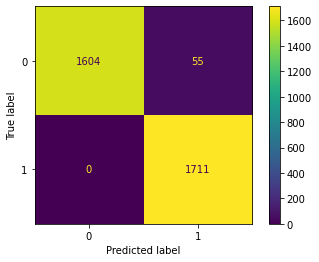

Precision tests: 0.9688561721404304
Recall tests: 1.0


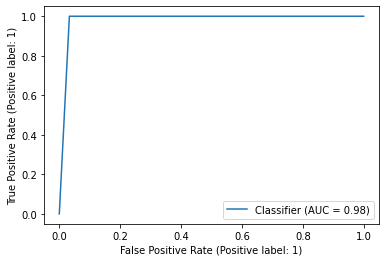

In [71]:
dt = DecisionTree()

gcv = GridSearchCV(estimator = dt, param_grid = {'leaf_size': [1, 5, 10], 'depth': [60, None], 'features': [[3], [5], None]})
gcv.fit(x_train, train_labels)
print(gcv.best_params_)
print(f"Accuracy train: {gcv.best_score_}")
x_test_predict = gcv.best_estimator_.predict(x_test)
Print_scores(test_labels, x_test_predict)

In [57]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()

clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

{'max_depth': 60, 'min_samples_leaf': 1}
Accuracy train: 0.9868658302274241
Accuracy tests: 0.9887240356083086


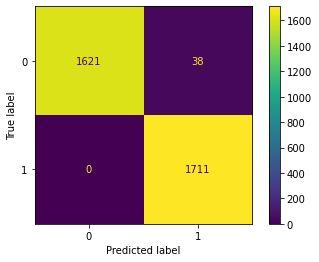

Precision tests: 0.978273299028016
Recall tests: 1.0


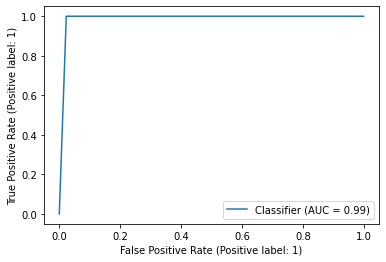

In [58]:
gcv = GridSearchCV(estimator = clf, param_grid={'min_samples_leaf': [1, 4, 8, 15], 'max_depth': [10, 20, 60, None]})
gcv.fit(x_train, train_labels)
print(gcv.best_params_)
print(f"Accuracy train: {gcv.best_score_}")
x_test_predict = gcv.best_estimator_.predict(x_test)
Print_scores(test_labels, x_test_predict)

# Random Forest

In [61]:
class RandomForest(BaseEstimator, ClassifierMixin):
    
    def __init__(self, features = 1, leaf_size = 1, depth = None, n_estimators = 10):
        self.leaf_size = leaf_size
        self.depth = depth
        self.features = features
        self.n_estimators = n_estimators
    
    def fit(self, data, labels):
        features = np.arange(data.shape[1])
        self.estimators = []
        indexes = np.arange(len(data))
        for i in range(self.n_estimators):
            np.random.shuffle(features)
            self.estimators.append(DecisionTree(leaf_size = self.leaf_size, depth = self.depth, features = features[:self.features]))
            idx = np.random.choice(indexes, (len(data),))
            self.estimators[-1].fit(data[idx], labels[idx])
        
    def predict_proba(self, data):
        pred = np.stack([est.predict_proba(data) for est in self.estimators], axis=1)
        return pred.mean(axis=1)
    
    def predict(self, data):
        return self.predict_proba(data).argmax(axis=1)
    

{'depth': None, 'features': 3, 'leaf_size': 3, 'n_estimators': 30}
Accuracy train: 0.8461697945970943
Accuracy tests: 0.8910979228486647


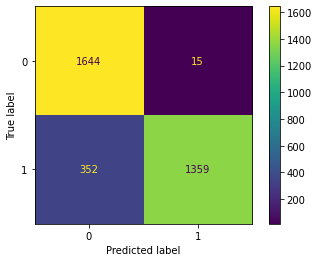

Precision tests: 0.9890829694323144
Recall tests: 0.7942723553477499


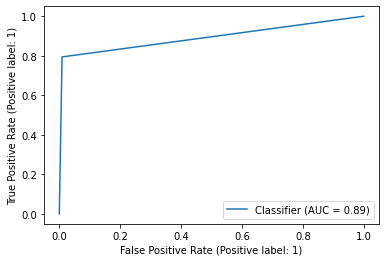

In [72]:
rf = RandomForest()

gcv = GridSearchCV(estimator = rf, param_grid = {'leaf_size': [1, 3], 'depth': [None], 'features' : [3, None], 'n_estimators' : [10, 30]})
gcv.fit(x_train, train_labels)
print(gcv.best_params_)
print(f"Accuracy train: {gcv.best_score_}")
x_test_predict = gcv.best_estimator_.predict(x_test)
Print_scores(test_labels, x_test_predict)

In [63]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

{'max_features': None, 'min_samples_leaf': 3, 'n_estimators': 30}
Accuracy train: 0.9897598586237841
Accuracy tests: 0.9887240356083086


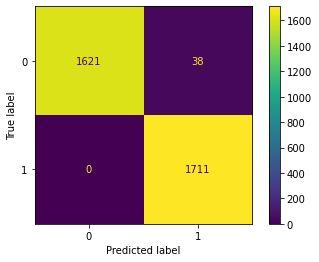

Precision tests: 0.978273299028016
Recall tests: 1.0


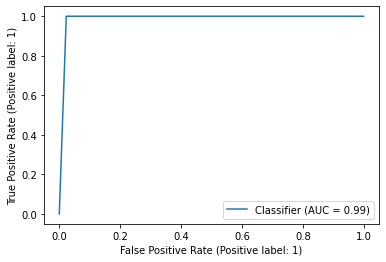

In [64]:
gcv = GridSearchCV(estimator = rf, param_grid={'min_samples_leaf': [3, 9], 'max_features': [None], 'n_estimators' : [10, 30]})
gcv.fit(x_train, train_labels)
print(gcv.best_params_)
print(f"Accuracy train: {gcv.best_score_}")
x_test_predict = gcv.best_estimator_.predict(x_test)
Print_scores(test_labels, x_test_predict)

# Выводы
Как видно, все модели хорошо справились с задачей, получив точность больше 85%.
